## WELCOME TO ORAN & ROTEM PROJECT !

Ours project is about the population in Israel

ENJOY !!!

In [1]:
import pandas as pd
import numpy as np

import csv

import time
from selenium import webdriver

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import sklearn
from sklearn import linear_model, metrics, preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error

## Crawling Data Stage

We need to go website https://www.cbs.gov.il
Our data is in 'תמותה-ותוחלת-חיים' page and 'לידות-חי' page.
To work and cleen the data we need to downlod those files.
 
Beacuse our web suffix in .apxs we used Selenium.
We then got excle data.

This is the link of toturial Selenium https://www.jcchouinard.com/learn-selenium-python-seo-automation/

In [2]:
def selenium_crawling(url, element_xpath, typh):
    driver=webdriver.Chrome(executable_path=r"/Applications/Google Chrome.app/Contents/MacOS/chromedriver")
    driver.get(url)
    time.sleep(10)
    linkText=driver.find_element_by_xpath(element_xpath)
    linkText.get_attribute(typh)
    linkText.click()

In [3]:
url_1 = 'https://www.cbs.gov.il/he/subjects/Pages/תמותה-ותוחלת-חיים.aspx'
element_xpath_1 = "/html/body/form/div[3]/div/div/main/div/div[3]/div[1]/div/div[1]/div[6]/div[1]/ul/li[3]/div/div[1]/a"
typh_1 = "href"
selenium_crawling(url_1, element_xpath_1, typh_1)

url_2 = 'https://www.cbs.gov.il/he/subjects/Pages/לידות-חי.aspx'
element_xpath_2 = "/html/body/form/div[3]/div/div/main/div/div[3]/div[1]/div/div[1]/div[6]/div[1]/ul/li[2]/div/div[1]/a"
typh_2 = "href"
selenium_crawling(url_2, element_xpath_2, typh_2)

## Clean Data Stage


After we downlod the excle files we move them to the same folder with this notebook.

Convert the Data Frame from an Excel table to csv.
we built functions to handle the data of the two tables we took out of the site
 we erasure all the rows and Columns that was irrelevant to our research question.
following the merger of the cells that existed in the original df, it was necessary to rename sane Columns name.

The mortality table presented the deaths each day, In order to unite the cells We changed the cell name from the date to  only his year.
Using a function  groupby we summed all the lines of all year into one line.
Concatenation the mortality df and Birth data to one table.

In [4]:
def convert_excel_tab_to_csv(year):
    df=pd.read_excel(io='p-1.xlsx',sheet_name=year)
    df.to_csv(year+'.csv',index=False)
    return df
    
def clean_daeth_data(df,year_csv,row_drop,col_drop):
    if row_drop != None:
        df.drop(labels=row_drop, axis=0, inplace=True)
    df.dropna(inplace=True)
    df.index = range(len(df))
    if col_drop != None:
        df.drop(columns=col_drop, axis=0, inplace=True)
        df.rename({'Unnamed: 0':'year','Unnamed: 1':'total_death','Unnamed: 4':'Jews_and_others_total_death',
                   'Unnamed: 7':'Arabs_total_death'}, axis=1, inplace=True)
    df.year = year_csv
    df = df.applymap(np.int64)
    df.to_csv(year_csv+'.csv',index=False)
    return df

def clean_born_data(df,df_name,row_drop,col_drop,col_new_name):
    df = df.T
    if row_drop != None:
        df.drop(labels=row_drop, axis=0, inplace=True)
    if col_drop != None:
        df.drop(columns=col_drop, axis=0, inplace=True)
        df.columns = [col_new_name]
    df = add_empty_row_to_top(df,2)
    df = add_empty_row_to_end(df,2)
    df = df.applymap(np.int64)
    df.index = range(2000,2022)
    df.to_csv(df_name+'.csv')
    return df

def clean_data_dropna(df,axis_1_0):
    df.dropna(axis=0, inplace=True)
    return df

def clean_rows_data(df,column_to_clean,max_num):
    for row in df.loc[column_to_clean]:
        df.loc[df[row] > max_num] = np.nan
    return df

def clean_columns_data(df,columns_list):
    df.drop(columns=columns_list, axis=1, inplace=True)
    return df

def gropby_data(df,column_grop,column_to_sum):
    df1 = df.groupby(column_grop)[column_to_sum].apply(lambda x : x.astype(int).sum())
    return df1

def add_empty_row_to_top(df,num_to_add):
    i=1
    for i in range(1,num_to_add+1):
        df1 = pd.DataFrame([[0] * len(df.columns)], columns=df.columns)
        df = df1.append(df, ignore_index=True)
    return df

def add_empty_row_to_end(df,num_to_add):
    i=1
    for i in range(1,num_to_add+1):
        df1 = pd.DataFrame([[0] * len(df.columns)], columns=df.columns)
        df = df.append(df1, ignore_index=True)
    return df

In [6]:
list_df = []
for i in range(2000,2022):
    df_death = convert_excel_tab_to_csv(str(i))
    file_name = str(i)+'.csv'
    df_death = pd.read_csv(file_name,low_memory=False)
    row_to_drop = [0,1,2,3,4,5,6,7,8,9,10]
    col_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 5','Unnamed: 6','Unnamed: 8','Unnamed: 9','Unnamed: 10',
                   'Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16',
                   'Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22',
                   'Unnamed: 23','Unnamed: 24','Unnamed: 25']
    df_death = clean_daeth_data(df_death,str(i),row_to_drop,col_to_drop)
    list_df.append(df_death)
    df_death

In [10]:
df_total = pd.concat(list_df)
df_total.to_csv('2000-2021.csv',index=False)
df_total

,year,total_death,Jews_and_others_total_death,Arabs_total_death
0,2000,134,117,17
1,2000,141,131,10
2,2000,134,118,16
3,2000,137,118,19
4,2000,133,117,16
...,...,...,...,...
145,2021,106,94,12
146,2021,113,104,9
147,2021,112,98,14
148,2021,114,100,14


In [11]:
column_grop = 'year'
column_to_sum = ["total_death","Jews_and_others_total_death","Arabs_total_death"]
df_total = gropby_data(df_total,column_grop,column_to_sum)
df_total.index = range(2000,2022)
df_total.to_csv('2000-2021_total.csv',index=False)
df_total

,total_death,Jews_and_others_total_death,Arabs_total_death
2000,37758,34263,3495
2001,37225,33649,3576
2002,38325,34639,3686
2003,38361,34548,3813
2004,37787,34177,3610
2005,38926,35064,3862
2006,38700,34720,3980
2007,39977,35926,4051
2008,39264,35262,4002
2009,38643,34541,4102


In [12]:
df_name = 'lidot_all_1'
df_born = pd.read_excel(io=df_name+'.xls')
df_born = df_born.to_csv(df_name+'.csv',index=False)
df_born = pd.read_csv(df_name+'.csv',low_memory=False)
row_to_drop = ['Unnamed: 0','Unnamed: 19']
col_to_drop = [0,1,2,3,4,5,7,8,9,10,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55]
col_new_name = ['total_born','Jews_and_others_total_born','Arabs_total_born']
df_born = clean_born_data(df_born,df_name,row_to_drop,col_to_drop,col_new_name)
df_born

,total_born,Jews_and_others_total_born,Arabs_total_born
2000,0,0,0
2001,0,0,0
2002,139535,98604,40931
2003,144936,103599,41337
2004,145207,104357,40850
2005,143913,105112,38801
2006,148170,109188,38982
2007,151679,112543,39136
2008,156923,117473,39450
2009,161042,121243,39799


In [14]:
df_total_merge = pd.concat([df_total,df_born], axis=1, join="inner")

df_total_merge.columns = ["total_death","Jews_and_others_total_death","Arabs_total_death",'total_born',
                       'Jews_and_others_total_born','Arabs_total_born']
df_total_merge.replace(0, np.nan, inplace=True)
df_total_merge.dropna(how='any',inplace=True)
df_total_merge.to_csv('2000-2021_total_merge.csv',index=True)
print(df_total_merge)

      total_death  Jews_and_others_total_death  Arabs_total_death  total_born  \
2002        38325                        34639               3686    139535.0   
2003        38361                        34548               3813    144936.0   
2004        37787                        34177               3610    145207.0   
2005        38926                        35064               3862    143913.0   
2006        38700                        34720               3980    148170.0   
2007        39977                        35926               4051    151679.0   
2008        39264                        35262               4002    156923.0   
2009        38643                        34541               4102    161042.0   
2010        39451                        35269               4182    166255.0   
2011        40668                        34994               3444    166296.0   
2012        41894                        37370               4524    170940.0   
2013        41489           

## EDA stage


In this stage we creat a new df for our pei and bar plot.
We what to show in pei plot in which year the data of Jews and Arabs death and born.
In the bar plot we showed the death and born on which one of the sectors.

In [15]:
def plot_pei(df,x_len,y_len):
    colors = ['m', 'c']
    labels_1 = ['Jews_and_others_total_death', 'Arabs_total_death']
    labels_2 = ['Jews_and_others_total_born', 'Arabs_total_born']
    for row in range(2009,2020):
        year = df.loc[row]    
        df1 = pd.DataFrame([year['Jews_and_others_total_death'],year['Arabs_total_death']],
                            index=['Jews_and_others_total_death','Arabs_total_death'], columns=[row]) 
        
        plot_1 = df1.plot.pie(figsize=(5,5),subplots=True,autopct='%1.1f%%',colors=colors)
        print(plot_1)

        df2 = pd.DataFrame([year['Jews_and_others_total_born'],year['Arabs_total_born']],
                             index=['Jews_and_others_total_born', 'Arabs_total_born'], columns=[row])
        
        plot_2 = df2.plot.pie(figsize=(5,5),subplots=True,autopct='%1.1f%%',colors=colors)
        print(plot_2)

[<AxesSubplot:ylabel='2009'>]
[<AxesSubplot:ylabel='2009'>]
[<AxesSubplot:ylabel='2010'>]
[<AxesSubplot:ylabel='2010'>]
[<AxesSubplot:ylabel='2011'>]
[<AxesSubplot:ylabel='2011'>]
[<AxesSubplot:ylabel='2012'>]
[<AxesSubplot:ylabel='2012'>]
[<AxesSubplot:ylabel='2013'>]
[<AxesSubplot:ylabel='2013'>]
[<AxesSubplot:ylabel='2014'>]
[<AxesSubplot:ylabel='2014'>]
[<AxesSubplot:ylabel='2015'>]
[<AxesSubplot:ylabel='2015'>]
[<AxesSubplot:ylabel='2016'>]
[<AxesSubplot:ylabel='2016'>]
[<AxesSubplot:ylabel='2017'>]
[<AxesSubplot:ylabel='2017'>]
[<AxesSubplot:ylabel='2018'>]
[<AxesSubplot:ylabel='2018'>]
[<AxesSubplot:ylabel='2019'>]
[<AxesSubplot:ylabel='2019'>]


/Users/oranco/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


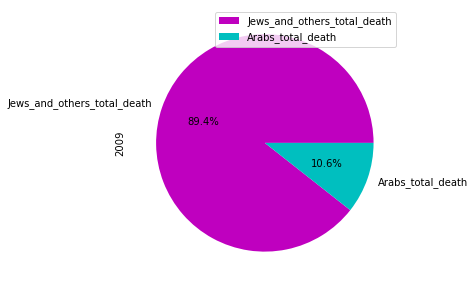

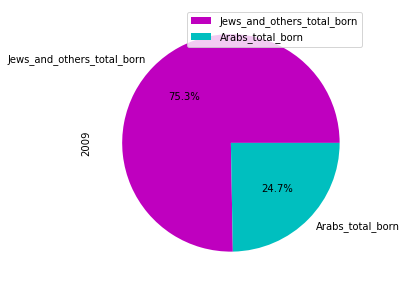

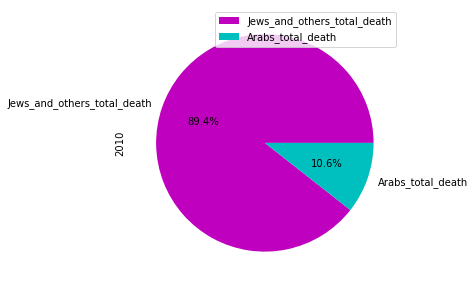

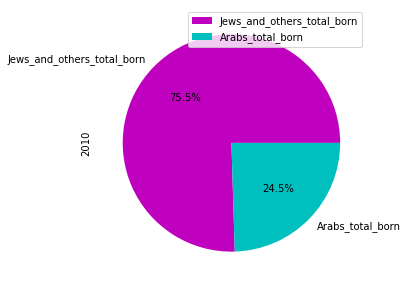

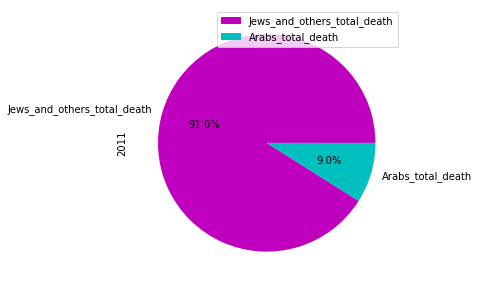

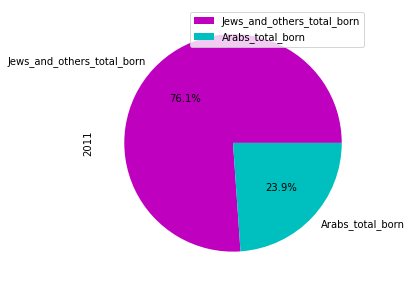

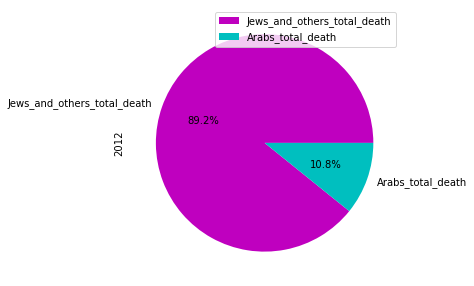

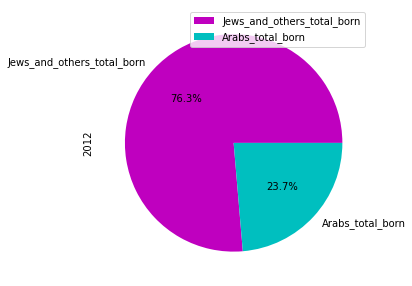

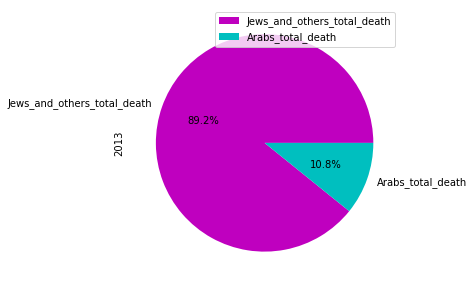

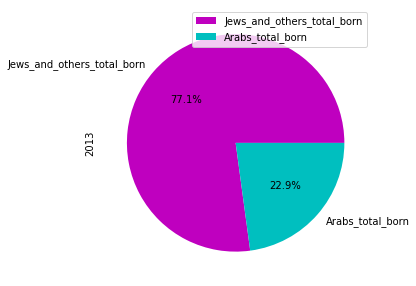

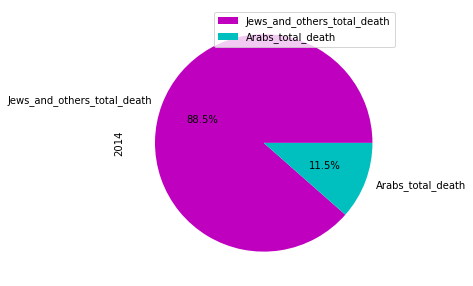

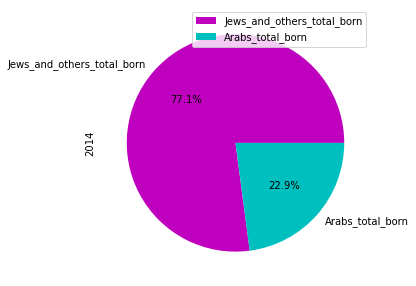

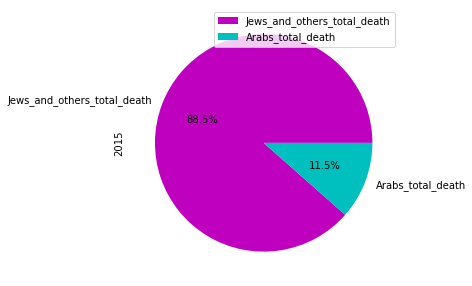

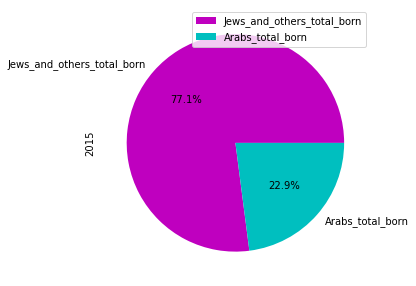

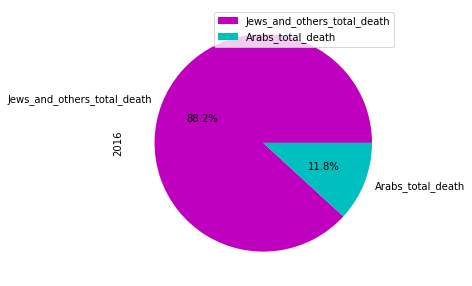

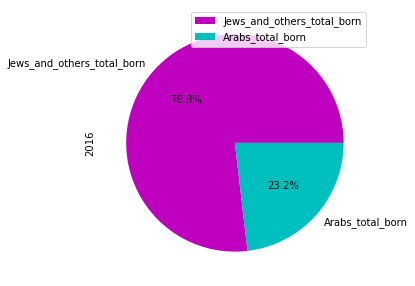

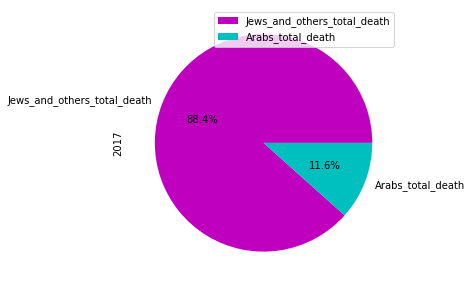

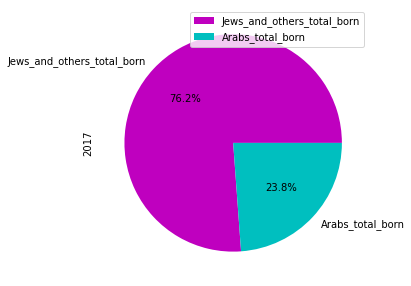

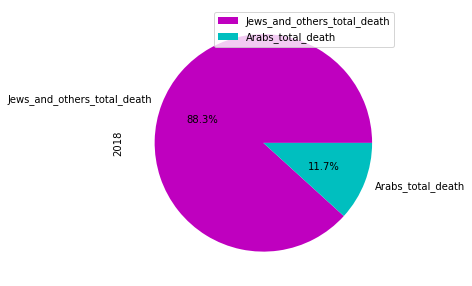

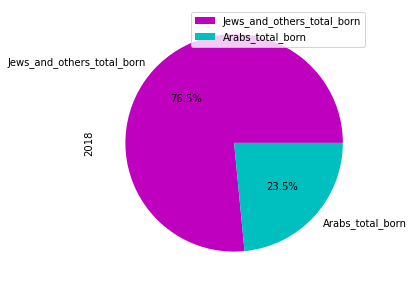

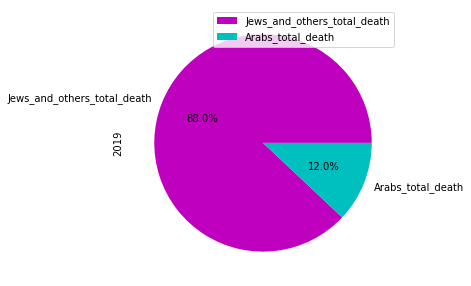

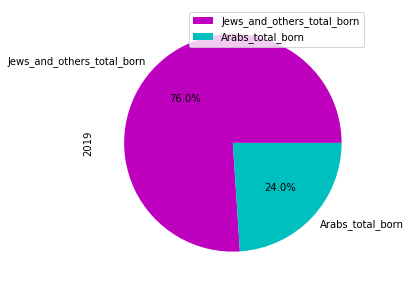

In [16]:
x_len,y_len = 11,2
plot_pei(df_total_merge,x_len,y_len)

In [17]:
def plot_bar(df):
    df_Arabs = df.copy()
    df_Arabs.drop(columns=['total_death','total_born','Jews_and_others_total_death','Jews_and_others_total_born'],inplace=True)
    df_Jews = df.copy()
    df_Jews.drop(columns=['total_death','total_born','Arabs_total_death','Arabs_total_born'],inplace=True)
    ax_1 = df_Arabs.plot.bar(rot=0,figsize = (20,10))
    ax_2 = df_Jews.plot.bar(rot=0,figsize = (20,10))
    print(ax_1)
    print(ax_2)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


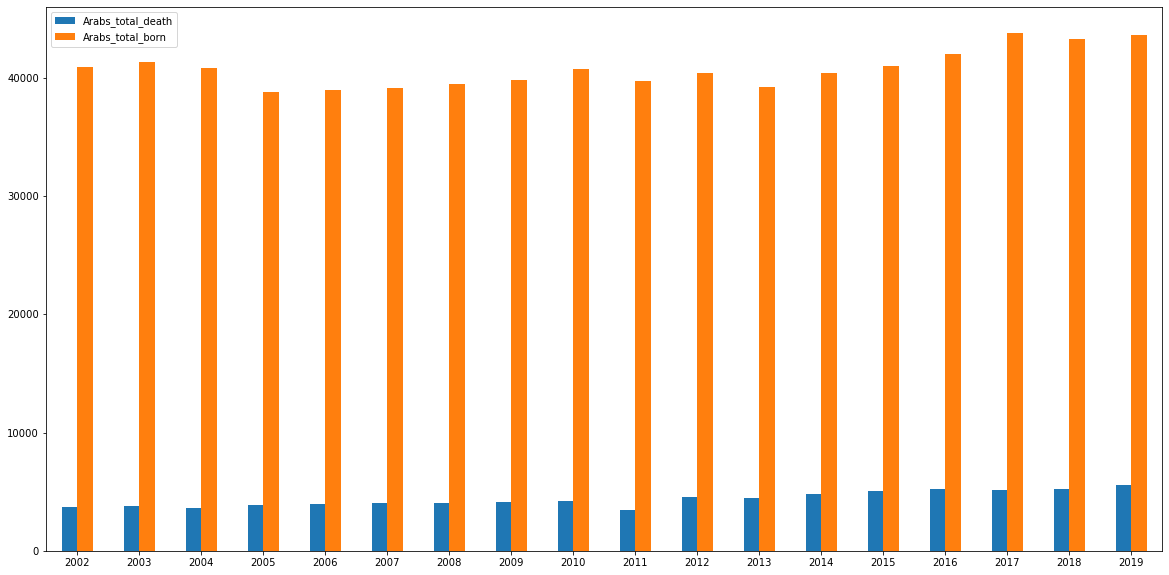

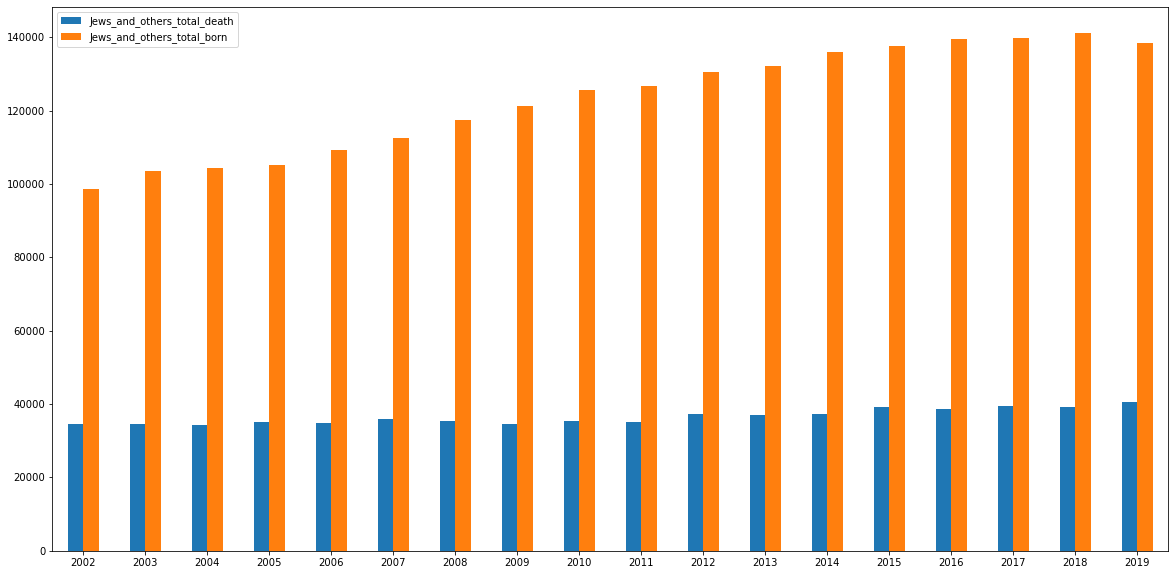

In [18]:
plot_bar(df_total_merge)

## Machin Lerning Stage


We want to chack each one of the sectors have mor growing.
First we need to chack each individually.
Secund we need to chack all togeter.

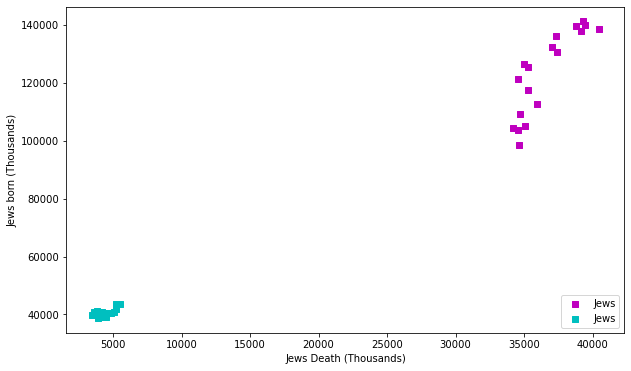

In [19]:
plt.scatter(x=df_total_merge['Jews_and_others_total_death'],y=df_total_merge['Jews_and_others_total_born'],c='m',marker='s',label='Jews')
plt.scatter(x=df_total_merge['Arabs_total_death'],y=df_total_merge['Arabs_total_born'],c='c',marker='s',label='Jews')


plt.legend(numpoints=1,loc=4)
plt.xlabel('Jews Death (Thousands)')
plt.ylabel('Jews born (Thousands)')
plt.show()

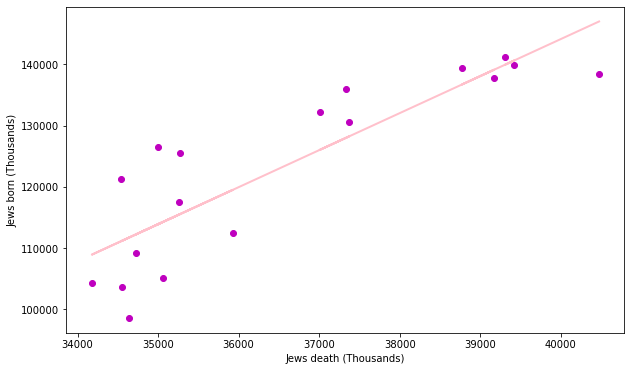

Slope: [[6.04253315]]
Intercept: [-97584.97054697]
R2: 0.7383320460669993


In [20]:
lr_Jews = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df_total_merge['Jews_and_others_total_death'].values.reshape(df_total_merge['Jews_and_others_total_death'].shape[0],1)
y = df_total_merge['Jews_and_others_total_born'].values.reshape(df_total_merge['Jews_and_others_total_born'].shape[0],1)

lr_Jews.fit(X=x, y=y)

plt.scatter(x, y,  color='m')
plt.plot(x, lr_Jews.predict(x), color='pink', linewidth=2)

plt.xlabel('Jews death (Thousands)')
plt.ylabel('Jews born (Thousands)')
plt.show()

print("Slope:",lr_Jews.coef_)
print("Intercept:",lr_Jews.intercept_)
print("R2:",lr_Jews.score(x,y))

In [22]:
mean_squared_error(df_total_merge.Jews_and_others_total_born.tolist(),lr_Jews.predict(df_total_merge.iloc[:,1:2]).flatten())*len(df_total_merge.Jews_and_others_total_born.tolist())


951328825.379668

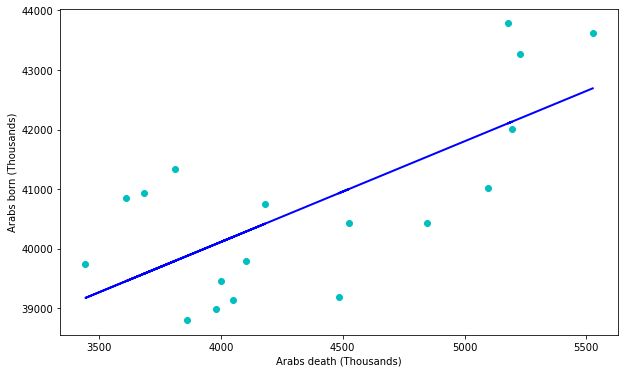

Slope: [[1.69098132]]
Intercept: [33347.90096286]
R2: 0.4926232182974972


In [23]:
lr_Arabs = linear_model.LinearRegression() # create a linear regression object

# scikit-learn doesn't work as well with pandas, so we have to extract values 
x = df_total_merge['Arabs_total_death'].values.reshape(df_total_merge['Arabs_total_death'].shape[0],1)
y = df_total_merge['Arabs_total_born'].values.reshape(df_total_merge['Arabs_total_born'].shape[0],1)

lr_Arabs.fit(X=x, y=y)

plt.scatter(x, y,  color='c')
plt.plot(x, lr_Arabs.predict(x), color='blue', linewidth=2)

plt.xlabel('Arabs death (Thousands)')
plt.ylabel('Arabs born (Thousands)')
plt.show()

print("Slope:",lr_Arabs.coef_)
print("Intercept:",lr_Arabs.intercept_)
print("R2:",lr_Arabs.score(x,y))

In [24]:
mean_squared_error(df_total_merge.Arabs_total_born.tolist(),lr_Arabs.predict(df_total_merge.iloc[:,2:3]).flatten())*len(df_total_merge.Arabs_total_born.tolist())


21084743.245609418

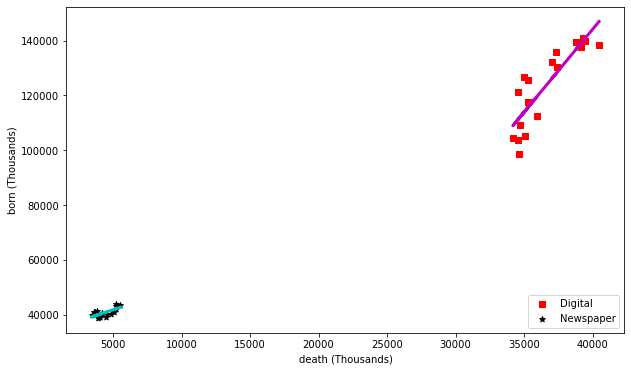

In [25]:
plt.scatter(x=df_total_merge['Jews_and_others_total_death'],y=df_total_merge['Jews_and_others_total_born'],c='r',marker='s',label='Digital')
plt.scatter(x=df_total_merge['Arabs_total_death'],y=df_total_merge['Arabs_total_born'],c='k',marker='*',label='Newspaper')
plt.legend(numpoints=1,loc=4)

plt.plot(df_total_merge['Jews_and_others_total_death'],lr_Jews.predict(df_total_merge['Jews_and_others_total_death'].values.reshape(df_total_merge['Jews_and_others_total_death'].shape[0],1)),c='m',linewidth=3)
plt.plot(df_total_merge['Arabs_total_death'],lr_Arabs.predict(df_total_merge['Arabs_total_death'].values.reshape(df_total_merge['Arabs_total_death'].shape[0],1)),c='c',linewidth=3)

plt.xlabel('death (Thousands)')
plt.ylabel('born (Thousands)')
plt.show()

## Multiple Linear Regression


                             total_death  Jews_and_others_total_death  \
total_death                     1.000000                     0.987335   
Jews_and_others_total_death     0.987335                     1.000000   
Arabs_total_death               0.932946                     0.962801   
total_born                      0.917372                     0.882114   
Jews_and_others_total_born      0.897916                     0.859263   
Arabs_total_born                0.706206                     0.717822   

                             Arabs_total_death  total_born  \
total_death                           0.932946    0.917372   
Jews_and_others_total_death           0.962801    0.882114   
Arabs_total_death                     1.000000    0.875041   
total_born                            0.875041    1.000000   
Jews_and_others_total_born            0.853462    0.996373   
Arabs_total_born                      0.701871    0.605373   

                             Jews_and_others_total_bo

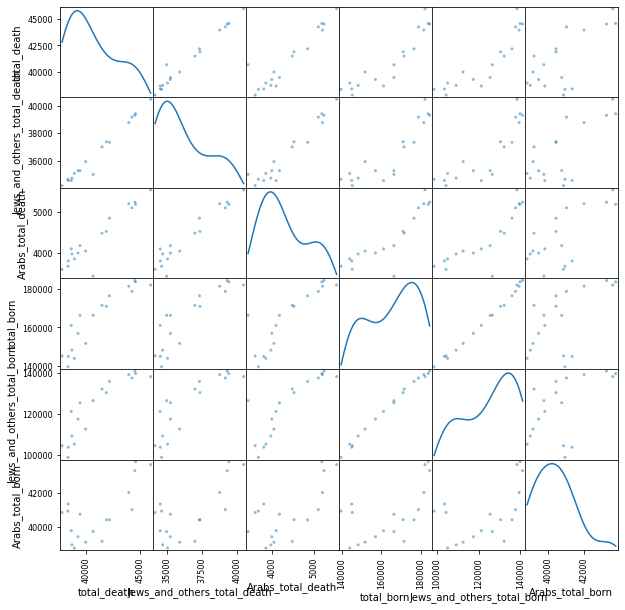

Slope: [ 1.54867007 -0.98374496]
Intercept: -11247.860879144391
R2: 0.9791031254259733


In [26]:
lr = linear_model.LinearRegression() # create a linear regression object

x = df_total_merge[['Jews_and_others_total_death','Arabs_total_death']]
y = df_total_merge['total_death']
lr.fit(X=x, y=y);

print(df_total_merge.corr())
pd.plotting.scatter_matrix(df_total_merge, figsize=(10, 10), diagonal='kde')
plt.show()

print("Slope:",lr.coef_)
print("Intercept:",lr.intercept_)
print("R2:",lr.score(x,y))